# Google Stock Price Prediction using LSTM - Part 2

### **Notebook #2: Data Preprocessing for Stock Price Prediction**

In this notebook, the main objective is to preprocess the stock price data by splitting it into training, validation, and test datasets, followed by scaling all the datasets. Proper preprocessing is essential for preparing the data for machine learning models, ensuring that the model can learn effectively from the data. 

#### **Outcome of This Notebook:**
By the end of this notebook, we aim to:
- Split the dataset into well-defined training, validation, and test sets.
- Scale the features and target variable to ensure all data is on the same scale.
- Save the preprocessed data for model training in later steps.

This preprocessed data will serve as the foundation for the next steps, where we will focus on building, training, and evaluating stock prediction models using the LSTM algorithm.

## 1. Libraries & Environment Setup

In [1]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import MinMaxScaler

# Set random seeds for reproducibility
random.seed(42)          # Set Python's random seed
np.random.seed(42)       # Set NumPy's random seed

## 2. Data Loading

In [2]:
# Loading both training and testing data
train_data = pd.read_csv('/Users/aries/Downloads/StockPrediction/data/interim/train_data_2014_onwards.csv')
test_data = pd.read_csv('/Users/aries/Downloads/StockPrediction/data/interim/test_data_cleaned.csv')

In [3]:
# Display the first few rows of cleaned train data
train_data.head()

,Date,Open,High,Low,Close,Volume
0,2014-03-27,566.44,566.44,551.41,556.93,13100.0
1,2014-03-28,559.66,564.88,557.14,558.46,41200.0
2,2014-03-31,565.34,565.45,555.41,555.45,10800.0
3,2014-04-01,557.18,566.89,557.18,565.61,7900.0
4,2014-04-02,598.35,603.17,560.65,565.45,147100.0


In [4]:
# Check the structure and summary statistics
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    698 non-null    object 
 1   Open    698 non-null    float64
 2   High    698 non-null    float64
 3   Low     698 non-null    float64
 4   Close   698 non-null    float64
 5   Volume  698 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.8+ KB


In [5]:
# Check the structure and summary statistics
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


## 3. Data Splitting

Given that our dataset spans from March 27, 2014, to December 30, 2016, here's how we can split the data:
1. **Training Data**:  
   This will consist of data up to a certain cutoff point before the validation period starts. We will use 80% of the available data for training, which might end around **mid-2016**. **Training Data Period**: From **2014-03-27** to **2016-06-30**

2. **Validation Data**:  
   This set is used to tune and evaluate our model. The validation data should come from the period immediately after the training period ends and before the test data. We will use the remaining 20% for validation, which would be the final part of our data, from around **mid-2016 to December 2016**. **Validation Data Period**: From **2016-07-01** to **2016-12-30**

In [6]:
# Convert the 'Date' column in both training and test datasets to datetime format for easier filtering and manipulation
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Define the date range for training and validation datasets
train_start_date = '2014-03-27'  # Start date for training data
train_end_date = '2016-06-30'    # End date for training data
validation_start_date = '2016-07-01'  # Start date for validation data
validation_end_date = '2016-12-30'    # End date for validation data

# Filter the training dataset to create subsets for training and validation
train_data_split = train_data[(train_data['Date'] >= train_start_date) & (train_data['Date'] <= train_end_date)]
validation_data_split = train_data[(train_data['Date'] >= validation_start_date) & (train_data['Date'] <= validation_end_date)]


In [7]:
# Print the shape of the training and validation data
print("Training Data Shape:", train_data_split.shape)
print("Validation Data Shape:", validation_data_split.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (571, 6)
Validation Data Shape: (127, 6)
Testing Data Shape: (20, 6)


In [8]:
def plot_stock_data(train_data, validation_data, test_data, column_name):
    """
    Plots the specified stock data column (e.g., 'Close', 'Open', etc.) for training, validation, and test data.
    
    Parameters:
    train_data (pd.DataFrame): The training data.
    validation_data (pd.DataFrame): The validation data.
    test_data (pd.DataFrame): The test data.
    column_name (str): The column name to plot (e.g., 'Close', 'Open').
    """
    plt.figure(figsize=(18, 6))
    
    # Plot the training data
    plt.plot(train_data['Date'], train_data[column_name], label='Training Data', color='blue')
    
    # Plot the validation data
    plt.plot(validation_data['Date'], validation_data[column_name], label='Validation Data', color='orange')
    
    # Plot the test data (if available)
    if test_data is not None:
        plt.plot(test_data['Date'], test_data[column_name], label='Test Data', color='green')
    
    # Customize the plot with a more descriptive title
    plt.title(f'{column_name} Stock Price: Training, Validation, and Test Data')
    plt.xlabel('Date')
    plt.ylabel(f'{column_name} Stock Price ($)')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


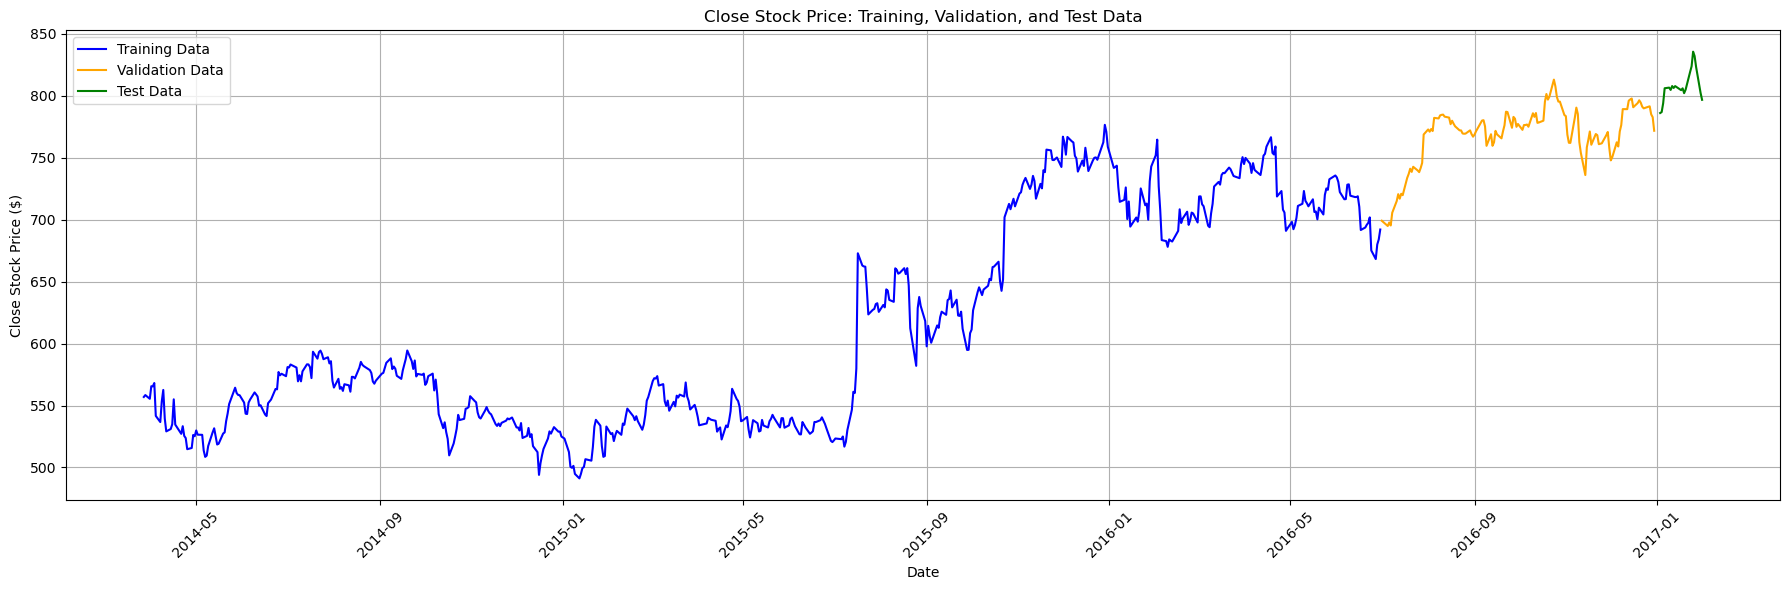

In [9]:
plot_stock_data(train_data_split, validation_data_split, test_data, 'Close')

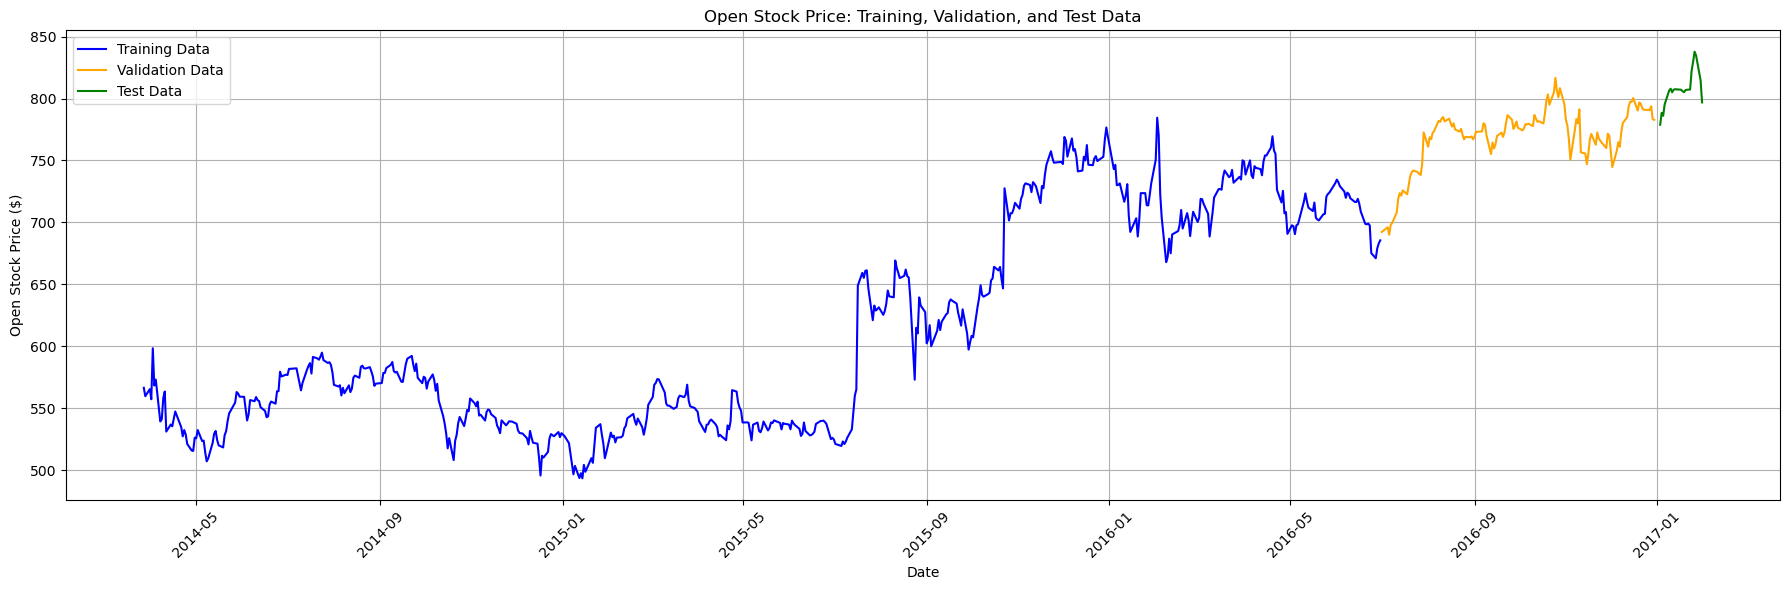

In [10]:
plot_stock_data(train_data_split, validation_data_split, test_data, 'Open')

   - **Train Data**: Covers from March 27, 2014, to June 30, 2016, indicating the first two years of stock data.
   - **Validation Data**: Covers from July 1, 2016, to December 30, 2016, representing the next six months after the training data.
   - **Test Data**: Covers January 2017, indicating the most recent data available for final testing.

## 4. Data Scaling

In [11]:
train_data_split.describe()

,Date,Open,High,Low,Close,Volume
count,571,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,2015-05-14 07:31:25.113835264,610.885604,615.999720,604.799019,610.499912,2.022741e+06
min,2014-03-27 00:00:00,493.300000,494.620000,486.230000,491.200000,7.900000e+03
25%,2014-10-18 12:00:00,538.165000,541.560000,534.085000,538.045000,1.433550e+06
50%,2015-05-14 00:00:00,576.080000,579.910000,571.090000,575.660000,1.765000e+06
75%,2015-12-05 12:00:00,700.885000,708.245000,693.245000,700.155000,2.228100e+06
max,2016-06-30 00:00:00,784.500000,789.870000,766.900000,776.600000,1.116490e+07
std,NaN,83.116959,84.065073,82.177413,83.096983,1.047559e+06


In [12]:
validation_data_split.describe()

,Date,Open,High,Low,Close,Volume
count,127,127.000000,127.000000,127.000000,127.000000,1.270000e+02
mean,2016-09-30 14:10:23.622047232,769.148740,774.137165,764.115197,769.182283,1.516121e+06
min,2016-07-01 00:00:00,689.980000,696.940000,688.220000,694.950000,5.874000e+05
25%,2016-08-16 12:00:00,761.850000,769.395000,755.800000,762.075000,1.090200e+06
50%,2016-09-30 00:00:00,773.450000,778.550000,768.790000,772.560000,1.318900e+06
75%,2016-11-14 12:00:00,782.820000,788.935000,778.970000,783.935000,1.700850e+06
max,2016-12-30 00:00:00,816.680000,816.680000,805.140000,813.110000,4.745200e+06
std,NaN,24.669964,24.418056,24.430884,23.759576,7.015494e+05


Given that the features in the dataset, including **Open**, **High**, **Low**, **Close**, and **Volume**, are on different scales, it’s essential to **scale** the data before feeding it into  LSTM (Long Short-Term Memory) model. LSTM models, are sensitive to the scale of input data. Features with large values (like **Volume**) can dominate the learning process, making it harder for the model to learn the important relationships between features. Scaling the data ensures that all features contribute equally to the model training, improving model performance and convergence.

**Normalization (Min-Max Scaling)** will be applied to rescale the data between 0 and 1, since we want to ensure that all features have a similar scale.

In [13]:
# Import MinMaxScaler to normalize data
scaler = MinMaxScaler()  # Creates a MinMaxScaler object for feature scaling

# Fit the scaler to the training data and normalize its features ('Open', 'High', 'Low', 'Close', 'Volume')
train_scaled = scaler.fit_transform(train_data_split[['Open', 'High', 'Low', 'Close', 'Volume']])

# Apply the same scaler (fitted on training data) to transform validation and test datasets
validation_scaled = scaler.transform(validation_data_split[['Open', 'High', 'Low', 'Close', 'Volume']])
test_scaled = scaler.transform(test_data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Save the scaled training data back into the original training DataFrame
train_data_scaled = train_data_split.copy()
train_data_scaled[['Open', 'High', 'Low', 'Close', 'Volume']] = train_scaled

# Save the scaled validation data back into the original validation DataFrame
validation_data_scaled = validation_data_split.copy()
validation_data_scaled[['Open', 'High', 'Low', 'Close', 'Volume']] = validation_scaled

# Save the scaled test data back into the original test DataFrame
test_data_scaled = test_data.copy()
test_data_scaled[['Open', 'High', 'Low', 'Close', 'Volume']] = test_scaled


To save the MinMaxScaler and use it for future scaling, like during inference, we will use Python’s joblib library to serialize and store the scaler to a local folder. This ensures that the scaling process is consistent and can be reapplied later.

In [14]:
# Save the MinMaxScaler to a local folder (e.g., 'scalers')
joblib.dump(scaler, '/Users/aries/Downloads/StockPrediction/models/minmax_scaler.pkl')

['/Users/aries/Downloads/StockPrediction/models/minmax_scaler.pkl']

In [15]:
train_data_scaled.head()

,Date,Open,High,Low,Close,Volume
0,2014-03-27,0.251168,0.243251,0.232230,0.230308,0.000466
1,2014-03-28,0.227885,0.237968,0.252645,0.235669,0.002985
2,2014-03-31,0.247390,0.239898,0.246482,0.225123,0.000260
3,2014-04-01,0.219368,0.244776,0.252788,0.260722,0.000000
4,2014-04-02,0.360749,0.367655,0.265151,0.260161,0.012476


In [16]:
validation_data_scaled.head()

,Date,Open,High,Low,Close,Volume
571,2016-07-01,0.683036,0.697815,0.733602,0.728837,0.119817
572,2016-07-05,0.696291,0.685250,0.722022,0.713910,0.130385
573,2016-07-06,0.675412,0.701304,0.722771,0.723791,0.125840
574,2016-07-07,0.703228,0.689517,0.719671,0.715347,0.116187
575,2016-07-08,0.708104,0.714953,0.748922,0.751331,0.140477


## 5. Save Processed Data

In [17]:
# Save the splitted data to CSV (train and validation)
train_data_split.to_csv('/Users/aries/Downloads/StockPrediction/data/processed/train_data_split.csv', index=False)
validation_data_split.to_csv('/Users/aries/Downloads/StockPrediction/data/processed/validation_data_split.csv', index=False)


# Save the scaled data to CSV (train, validation, and test)
train_data_scaled.to_csv('/Users/aries/Downloads/StockPrediction/data/processed/scaled_train_data.csv', index=False)
validation_data_scaled.to_csv('/Users/aries/Downloads/StockPrediction/data/processed/scaled_validation_data.csv', index=False)
test_data_scaled.to_csv('/Users/aries/Downloads/StockPrediction/data/processed/scaled_test_data.csv', index=False)
